# Bitácora para describir archivos con secuencias después del ensamblaje

In [2]:
cd  ~/Desktop/data/fasta/

/Users/migueldelrio/Desktop/data/fasta


In [3]:
from Bio import SeqIO
from pandas import DataFrame
import pandas as pd
from Bio.SeqUtils import GC
import pylab as pl
from pylab import *

In [4]:
def cpg(secuencia):
    g= secuencia.count("G")
    c= secuencia.count("C")
    cg= secuencia.count("CG")
    lar= len(secuencia)
    cpG=0
    try:
        g*c==0
    except:
        cpG=0
    else:
        if g == 0 or c== 0:
            cpG =0
        else:
            cpG=(round(cg/(g*c)*(lar**2/(lar-1)) ,8))
    return (cpG)

In [5]:
f = open('secuencias_anotadas.fasta', 'r')
sizes = [(rec.name, len(rec), round(GC(rec.seq),4), cpg(rec.seq)) for rec in SeqIO.parse(f, "fasta")]
sizes = DataFrame(sizes,columns= ["contigs", "length", "GC", "CpG"])
sizes.head(2)

,contigs,length,GC,CpG
0,Nav1_2_B_halotolerans,333,52.2523,0.941738
1,Nav1_8_B_aquimaris,332,53.0120,1.033235


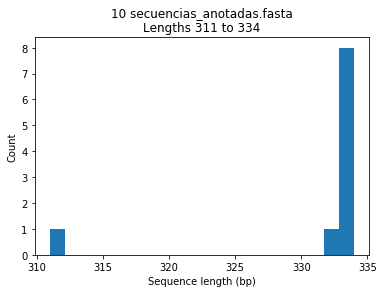

In [6]:
pl.hist(sizes['length'], bins=20)
pl.title("%i secuencias_anotadas.fasta\nLengths %i to %i" \
            % (len(sizes["length"]),min(sizes['length']),max(sizes['length'])))
pl.xlabel("Sequence length (bp)")
pl.ylabel("Count")
#pl.legend().set_visible(False)
pl.show()

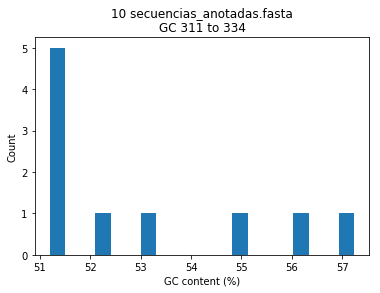

In [7]:
pl.hist(sizes['GC'], bins=20)
pl.title("%i secuencias_anotadas.fasta\nGC %i to %i" \
            % (len(sizes["length"]),min(sizes['length']),max(sizes['length'])))
pl.xlabel("GC content (%)")
pl.ylabel("Count")
#pl.legend().set_visible(False)
pl.show()

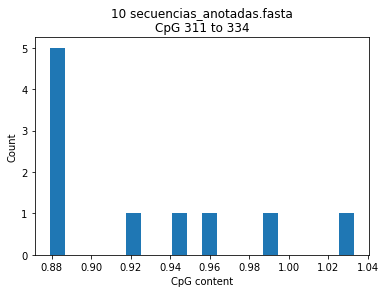

In [8]:
pl.hist(sizes['CpG'], bins=20)
pl.title("%i secuencias_anotadas.fasta\nCpG %i to %i" \
            % (len(sizes["length"]),min(sizes['length']),max(sizes['length'])))
pl.xlabel("CpG content")
pl.ylabel("Count")
#pl.legend().set_visible(False)
pl.show()

In [9]:
sizes1 = sizes['length'].value_counts(normalize=False, sort=False, ascending=False, 
                                  bins=range(0,sizes['length'].max()+100,100), dropna=True)
sizes1

(-0.001, 100.0]     0
(100.0, 200.0]      0
(200.0, 300.0]      0
(300.0, 400.0]     10
Name: length, dtype: int64

In [10]:
sizesgc = sizes['GC'].value_counts(normalize=False, sort=False, ascending=False, 
                                  bins=range(0,int(sizes['GC'].max()+10),10), dropna=True)
sizesgc

(-0.001, 10.0]     0
(10.0, 20.0]       0
(20.0, 30.0]       0
(30.0, 40.0]       0
(40.0, 50.0]       0
(50.0, 60.0]      10
Name: GC, dtype: int64